In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [8]:
# Efetua carga da base
_df = pd.read_excel('DataFrame_Processos_Percentual_Base_Completa.xlsx')
_df = _df.loc[_df['Processo']=='Rotina_04']
_df.head()

,DiaInicio,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao
1077,2021-01-05,2021-01-05 02:44:00,2021-01-05 06:30:00,Rotina_04,226,164.0
1078,2021-01-06,2021-01-06 02:16:00,2021-01-06 06:52:00,Rotina_04,276,136.0
1079,2021-01-07,2021-01-07 04:27:00,2021-01-07 11:11:00,Rotina_04,404,267.0
1080,2021-01-08,2021-01-08 04:06:00,2021-01-08 10:44:00,Rotina_04,398,246.0
1081,2021-01-09,2021-01-09 02:06:00,2021-01-09 06:15:00,Rotina_04,249,126.0


In [3]:
# Cria Dataframe somente com as colunas que interessam
df = pd.DataFrame(_df, columns = ['DiaInicio', 'TempoMinutos'])
df.DiaInicio = pd.to_datetime(df.DiaInicio)
df.set_index('DiaInicio', inplace=True)

In [4]:
df.head()

,TempoMinutos
DiaInicio,
2021-01-05,226
2021-01-06,276
2021-01-07,404
2021-01-08,398
2021-01-09,249


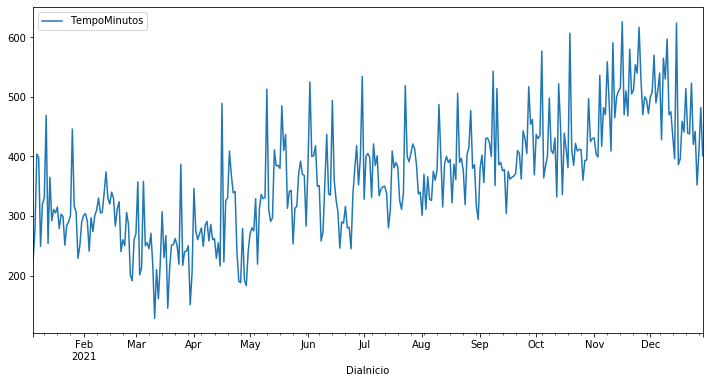

In [5]:
df.plot(figsize=(12,6))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

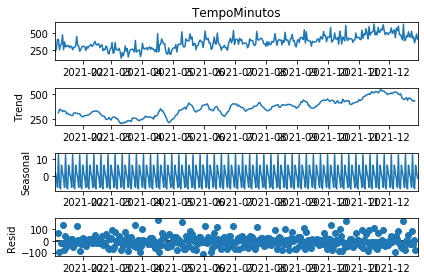

In [7]:
results = seasonal_decompose(df['TempoMinutos'])
results.plot();

In [8]:
len(df)

359

In [9]:
# 359-12 = 347
train = df.iloc[:347]
test = df.iloc[347:]

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
df.head(),df.tail()

(            TempoMinutos
 DiaInicio               
 2021-01-05           226
 2021-01-06           276
 2021-01-07           404
 2021-01-08           398
 2021-01-09           249,
             TempoMinutos
 DiaInicio               
 2021-12-25           442
 2021-12-26           352
 2021-12-27           408
 2021-12-28           482
 2021-12-29           401)

In [12]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
scaled_train[:10]

array([[0.19678715],
       [0.29718876],
       [0.55421687],
       [0.54216867],
       [0.24297189],
       [0.38554217],
       [0.40562249],
       [0.68473896],
       [0.25301205],
       [0.47590361]])

In [14]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
# define generator
n_tam_agrupamento = 5 # tamanho que será feito o agrupamento
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_tam_agrupamento, batch_size=1)

In [16]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.19678715 0.29718876 0.55421687 0.54216867 0.24297189]
Predict this y: 
 [[0.38554217]]


In [17]:
X.shape

(1, 5, 1)

In [18]:
# n_input - qtdade de períodos a serem previstos
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [21]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(50))
model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.00001), metrics=[RootMeanSquaredError()])

'''
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))
model.compile(optimizer='adam', loss='mse')
'''



"\nmodel = Sequential()\nmodel.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))\nmodel.add(Dense(8, 'relu'))\nmodel.add(Dense(1, 'linear'))\nmodel.compile(optimizer='adam', loss='mse')\n"

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 45,901
Trainable params: 45,901
Non-trainable params: 0
_________________________________________________________________


In [23]:
# fit model - a partir de 20 épocas ja não tem mais ganho
model.fit(generator,epochs=20)

Epoch 1/20
335/335 [==============================] - 2s 3ms/step - loss: 0.2566 - root_mean_squared_error: 0.5065
Epoch 2/20
335/335 [==============================] - 1s 3ms/step - loss: 0.1628 - root_mean_squared_error: 0.4035
Epoch 3/20
335/335 [==============================] - 1s 3ms/step - loss: 0.0852 - root_mean_squared_error: 0.2919
Epoch 4/20
335/335 [==============================] - 1s 3ms/step - loss: 0.0343 - root_mean_squared_error: 0.1853
Epoch 5/20
335/335 [==============================] - 1s 3ms/step - loss: 0.0208 - root_mean_squared_error: 0.1442
Epoch 6/20
335/335 [==============================] - 1s 3ms/step - loss: 0.0192 - root_mean_squared_error: 0.1385
Epoch 7/20
335/335 [==============================] - 1s 3ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371
Epoch 8/20
335/335 [==============================] - 1s 3ms/step - loss: 0.0185 - root_mean_squared_error: 0.1360
Epoch 9/20
335/335 [==============================] - 1s 3ms/step - loss: 0.0181

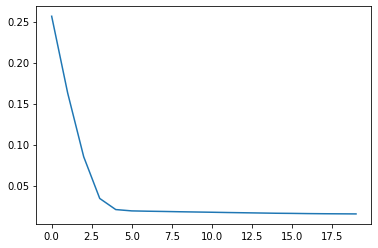

In [24]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [25]:
last_train_batch = scaled_train[-n_input:]

In [26]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [27]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 160ms/step


array([[0.6591464]], dtype=float32)

In [28]:
scaled_test[0]

array([0.66465863])

In [29]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 20ms/step


In [30]:
test_predictions

[array([0.6591464], dtype=float32),
 array([0.6506051], dtype=float32),
 array([0.65012825], dtype=float32),
 array([0.6418885], dtype=float32),
 array([0.63692534], dtype=float32),
 array([0.628489], dtype=float32),
 array([0.6269392], dtype=float32),
 array([0.62358254], dtype=float32),
 array([0.62280506], dtype=float32),
 array([0.6240344], dtype=float32),
 array([0.61013705], dtype=float32),
 array([0.6120477], dtype=float32)]

In [31]:
test.head()

,TempoMinutos
DiaInicio,
2021-12-18,459
2021-12-19,441
2021-12-20,514
2021-12-21,439
2021-12-22,438


In [32]:
true_predictions = scaler.inverse_transform(test_predictions)

In [33]:
test['Predictions'] = true_predictions

C:\Users\Michael\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
test.head(20)

,TempoMinutos,Predictions
DiaInicio,,
2021-12-18,459,456.254921
2021-12-19,441,452.001331
2021-12-20,514,451.763866
2021-12-21,439,447.660473
2021-12-22,438,445.188819
2021-12-23,523,440.987531
2021-12-24,420,440.215710
2021-12-25,442,438.544106
2021-12-26,352,438.156919


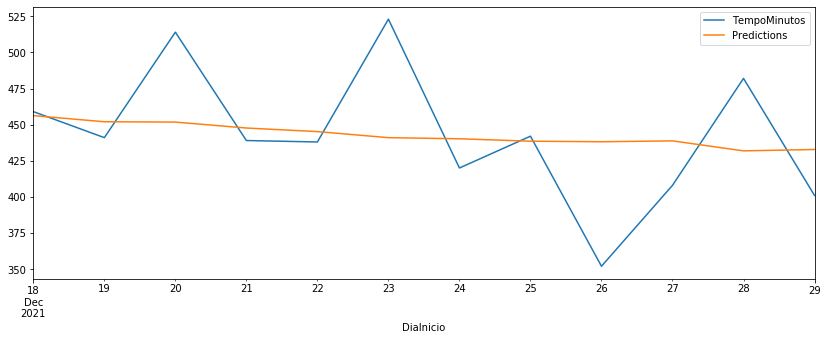

In [35]:
test.plot(figsize=(14,5))

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['TempoMinutos'],test['Predictions']))
print(rmse)

43.94259824870671
